# Personality traits predictions - OpenFace predictions
### This scripts contains EDA, personality traits predictions, and OpenFace predictions.

## Loading the data

In [1]:
# Importing the libraries to load the data
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
import scipy
import scipy.stats
from scipy.io import loadmat

In [2]:
path = # Please insert your own path
#os.listdir(path)

In [3]:
infile_annot_training = open(path+"\\"+"annotation_training.pkl", "rb")
annotation_training = pickle.load(infile_annot_training, encoding = "latin1")

infile_annot_validation = open(path+"\\"+"annotation_validation.pkl", "rb")
annotation_validation = pickle.load(infile_annot_validation, encoding = "latin1")

#infile_trans_test = open(path+"\\"+"transcription_test.pkl", "rb")
#transcription_test = pickle.load(infile_trans_test, encoding = "latin1")

#infile_trans_training = open(path+"\\"+"transcription_training.pkl", "rb")
#transcription_training = pickle.load(infile_trans_training, encoding = "latin1")

#infile_trans_validation = open(path+"\\"+"transcription_validation.pkl", "rb")
#transcription_validation = pickle.load(infile_trans_validation, encoding = "latin1")

In [4]:
# Reading in the ethnicity and gender data
excel_data = pd.read_excel(r"C:\Users\Marie-Claire\Downloads\eth_gender_anno_all.xlsx")
#excel_data.head()

## Data analysis

In [5]:
# Checking number of unique YoutTube vloggers
excel_data['YouTubeID'].nunique()

3060

In [6]:
# Converting the annotation data to dataframes and specifying the index column
anno_df = pd.DataFrame(annotation_training)
anno_df.reset_index(inplace = True)

anno_test_df = pd.DataFrame(annotation_validation)
anno_test_df.reset_index(inplace = True)

In [7]:
# Renaming column to merge the gender-ethnicity and annotation dataframes
anno_df.rename(columns = {"index" : "VideoName", 
                         }, inplace = True)

anno_test_df.rename(columns = {"index" : "VideoName", 
                         }, inplace = True)

# Merging the dataframes anno_df and excel_data on the VideoName column as a training set
merged_df = pd.merge(anno_df, excel_data, how = "left", on = ["VideoName"])
#merged_df.info

merged_df_test = pd.merge(anno_test_df, excel_data, how = "left", on = ["VideoName"])
#merged_df_test.info

In [8]:
# Creating complete data frame for EDA
anno_complete = pd.concat([anno_df, anno_test_df])
all_data = pd.merge(anno_complete, excel_data, how = "left", on = ["VideoName"])

In [9]:
# Checking for missing data & outliers
print(all_data.isnull().any())
print(all_data.describe())

VideoName            False
extraversion         False
neuroticism          False
agreeableness        False
conscientiousness    False
interview            False
openness             False
YouTubeID            False
Ethnicity            False
Gender               False
dtype: bool
       extraversion  neuroticism  agreeableness  conscientiousness  \
count   8000.000000  8000.000000    8000.000000        8000.000000   
mean       0.476313     0.520605       0.548898           0.524053   
std        0.151226     0.152635       0.134234           0.155351   
min        0.000000     0.000000       0.000000           0.000000   
25%        0.373832     0.416667       0.461538           0.417476   
50%        0.476636     0.531250       0.560440           0.524272   
75%        0.579439     0.625000       0.637363           0.640777   
max        1.000000     0.979167       1.000000           1.000000   

         interview     openness    Ethnicity       Gender  
count  8000.000000  8000.00

In [10]:
# Convert columns to lowercase
all_data.columns = all_data.columns.str.lower()
merged_df.columns = merged_df.columns.str.lower()
merged_df_test.columns = merged_df_test.columns.str.lower()

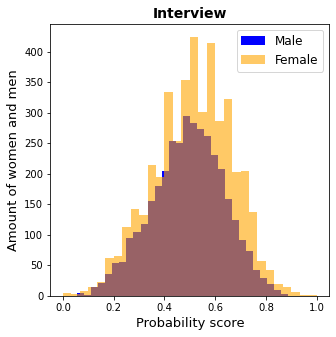

In [11]:
# Displaying distributions of gender per personality trait and the interview variable
#cols = all_data[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'interview', 'openness']]
cols = all_data[['interview']]
fig = plt.figure(figsize = (5,5))
i = 0
for column in cols:
    #i += 1
    #fig.add_subplot(3, 2, i)
    plt.plot(1,1)
    plt.hist(all_data[all_data["gender"] == 1][column], label = "Male", bins = 30, color= 'blue')
    plt.hist(all_data[all_data["gender"] == 2][column], label = "Female", bins = 30, alpha = 0.6, color= 'orange')
    plt.title(column.capitalize(), fontsize = 14, fontweight='bold')
    plt.xlabel("Probability score", fontsize= 13)
    plt.ylabel("Amount of women and men", fontsize= 13)
    plt.legend(loc = "upper right", fontsize = "large")

In [12]:
# Descriptives of men for hireability
men = all_data[all_data["gender"] == 1]["interview"]
#print(men)
print(all_data[all_data["gender"] == 1]["interview"].std())

0.14284327704430083


In [13]:
# Descriptives of women for hireability
women = all_data[all_data["gender"] == 2]["interview"]
#print(women)
print(all_data[all_data["gender"] == 2]["interview"].std())

0.15319215486254284


### Testing for a significant difference between gender groups

In [14]:
scipy.stats.mannwhitneyu(men, women)

MannwhitneyuResult(statistic=7264552.0, pvalue=2.80479970301992e-11)

---------------
#### Distributions per ethnical group

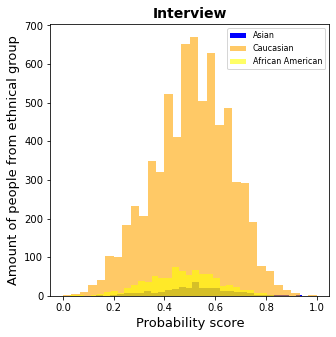

In [15]:
# Displaying distributions of ethnicity per personality trait and the interview variable
#cols = all_data[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'interview', 'openness']]
cols = all_data[['interview']]
fig = plt.figure(figsize = (5,5))
#i = 0
for column in cols:
    #i += 1
    plt.plot(1,1)
    plt.hist(all_data[all_data["ethnicity"] == 1][column], label = "Asian", bins = 30, color = 'blue')
    plt.hist(all_data[all_data["ethnicity"] == 2][column], label = "Caucasian", bins = 30, alpha = 0.6, color= 'orange')
    plt.hist(all_data[all_data["ethnicity"] == 3][column], label = "African American", bins = 30, alpha = 0.6, color= 'yellow')
    plt.title(column.capitalize(), fontsize = 14, fontweight='bold')
    plt.xlabel("Probability score", fontsize = 13)
    plt.ylabel("Amount of people from ethnical group", fontsize = 13)
    plt.legend(loc = "upper right", fontsize = 8)

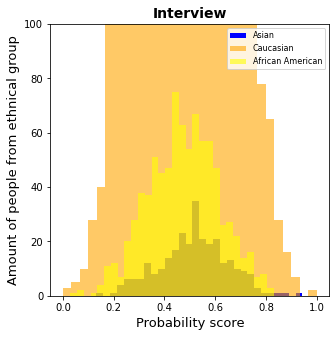

In [16]:
# Displaying distributions of ethnicity per personality trait and the interview variable
#cols = all_data[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'interview', 'openness']]
cols = all_data[['interview']]
fig = plt.figure(figsize = (5,5))
#i = 0
for column in cols:
    #i += 1
    plt.plot(1,1)
    plt.hist(all_data[all_data["ethnicity"] == 1][column], label = "Asian", bins = 30, color = 'blue')
    plt.hist(all_data[all_data["ethnicity"] == 2][column], label = "Caucasian", bins = 30, alpha = 0.6, color= 'orange')
    plt.hist(all_data[all_data["ethnicity"] == 3][column], label = "African American", bins = 30, alpha = 0.6, color= 'yellow')
    plt.title(column.capitalize(), fontsize = 14, fontweight='bold')
    plt.xlabel("Probability score", fontsize = 13)
    plt.ylabel("Amount of people from ethnical group", fontsize = 13)
    plt.ylim([0, 100])
    plt.legend(loc = "upper right", fontsize = 8)

In [17]:
# Descriptives of Asian ethnicity for hireability
asian = all_data[all_data["ethnicity"] == 1]["interview"]
print(all_data[all_data["ethnicity"] == 1]["interview"].mean())
print(all_data[all_data["ethnicity"] == 1]["interview"].std())

0.5152736039100426
0.13448663229886249


In [18]:
# Descriptives of Caucasian ethnicity for hireability
cauc = all_data[all_data["ethnicity"] == 2]["interview"]
print(all_data[all_data["ethnicity"] == 2]["interview"].mean())
print(all_data[all_data["ethnicity"] == 2]["interview"].std())

0.507136541103812
0.15026298490853182


In [19]:
# Descriptives of African American ethnicity for hireability
african = all_data[all_data["ethnicity"] == 3]["interview"]
print(all_data[all_data["ethnicity"] == 3]["interview"].mean())
print(all_data[all_data["ethnicity"] == 3]["interview"].std())

0.47477076873848295
0.13899587565563773


### Testing for a significant difference between ethnical groups

In [20]:
print("1) Mann Whitney U: Asian - Caucasian:           ", scipy.stats.mannwhitneyu(asian, cauc))
print("2) Mann Whitney U: Asian - African American:    ", scipy.stats.mannwhitneyu(asian, african))
print("3) Mann Whitney U: African American - Caucasian:", scipy.stats.mannwhitneyu(african, cauc))

1) Mann Whitney U: Asian - Caucasian:            MannwhitneyuResult(statistic=951677.0, pvalue=0.27421346048040524)
2) Mann Whitney U: Asian - African American:     MannwhitneyuResult(statistic=99782.5, pvalue=1.2056491003420835e-05)
3) Mann Whitney U: African American - Caucasian: MannwhitneyuResult(statistic=2516504.5, pvalue=6.626649580056938e-11)


---------------------

In [21]:
# Counting the amount of men and women in train + test set
all_data.groupby(["gender"]).size()

gender
1    3650
2    4350
dtype: int64

In [22]:
# Descriptive statistics grouped by ethnicity and gender
all_data.groupby(['ethnicity','gender']).size()           # imbalanced groups

ethnicity  gender
1          1           82
           2          201
2          1         3300
           2         3570
3          1          268
           2          579
dtype: int64

-----------------------

## Predictions with personality traits

#### All models that will be trained:
- Model 1 = Job interview ~ Personality traits
- Model 2 = Job interview ~ Personality traits + Gender
- Model 3 = Job interview ~ Personality traits + Ethnicity
- Model 4 = Job interview ~ Personality traits + Gender + Ethnicity

### Model 1 - Job interview ~ personality traits
#### Multiple linear regression

In [23]:
# Splitting the (in)dependent variables of training set
X_1_train_pers = merged_df[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness']].values
y_1_train_pers = merged_df.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_1_test_pers = merged_df_test[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness']].values
y_1_test_pers = merged_df_test.loc[:,['interview']].values

# -------------------------------------------------------
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_1_train_pers, y_1_train_pers)

# -------------------------------------------------------
# Predicting the test set labels
y_1_pred_pers = regressor.predict(X_1_test_pers)

# -------------------------------------------------------
# Various performance measure scores

print("MLR MSE {:.3}".format(mean_squared_error(y_1_test_pers, y_1_pred_pers)))
print("MLR MAE {:.3}".format(mean_absolute_error(y_1_test_pers, y_1_pred_pers)))
print("MLR 1 - MAE = {:.4}".format(1-mean_absolute_error(y_1_test_pers, y_1_pred_pers)))

MLR MSE 0.00186
MLR MAE 0.0344
MLR 1 - MAE = 0.9656


In [24]:
# Creating a baseline by taking the MAE of the test set outcome variable and the mean of the training set outcome variable
1 - mean_absolute_error(y_1_test_pers, np.full(2000, np.mean(y_1_train_pers)))

0.8830107663551402

#### Random forest regression Model 1

In [25]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_1_train_pers, y_1_train_pers.ravel())

# Using .ravel() to get the correct format
rfr_y_1_pers = rfr.predict(X_1_test_pers)
print("MSE {:.3}".format(mean_squared_error(y_1_test_pers, rfr_y_1_pers)))
print("MAE {:.3}".format(mean_absolute_error(y_1_test_pers, rfr_y_1_pers)))
print("1 - MAE {:.4}".format((1-mean_absolute_error(y_1_test_pers, rfr_y_1_pers))))

MSE 0.00235
MAE 0.0382
1 - MAE 0.9618


#### Support vector regression Model 1

In [26]:
svr = SVR(kernel = 'rbf')
svr.fit(X_1_train_pers, y_1_train_pers.ravel())
svr_y_1_pers = svr.predict(X_1_test_pers)

print("MSE {:.3}".format(mean_squared_error(y_1_test_pers, svr_y_1_pers)))
print("MAE {:.3}".format(mean_absolute_error(y_1_test_pers, svr_y_1_pers)))
print("1 - MAE {:.4}".format(1-(mean_absolute_error(y_1_test_pers, svr_y_1_pers))))

MSE 0.00205
MAE 0.0359
1 - MAE 0.9641


### Model 2 - Job interview ~ personality traits + gender
#### Multiple linear regression

In [27]:
# Splitting the (in)dependent variables of training set
X_2_train_pers = merged_df[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness', 'gender']].values
y_2_train_pers = merged_df.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_2_test_pers = merged_df_test[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness', 'gender']].values
y_2_test_pers = merged_df_test.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of gender
le = LabelEncoder()
X_2_train_pers[:, -1] = le.fit_transform(X_2_train_pers[:, -1])
X_2_test_pers[:, -1] = le.fit_transform(X_2_test_pers[:, -1])

# -------------------------------------------------------
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_2_train_pers, y_2_train_pers)

# -------------------------------------------------------
# Predicting the test set labels
y_2_pred_pers = regressor.predict(X_2_test_pers)

# -------------------------------------------------------
# Various performance measure scores

print("MLR MSE {:.3}".format(mean_squared_error(y_2_test_pers, y_2_pred_pers)))
print("MLR MAE {:.3}".format(mean_absolute_error(y_2_test_pers, y_2_pred_pers)))
print("MLR 1 - MAE = {:.4}".format(1-mean_absolute_error(y_2_test_pers, y_2_pred_pers)))

MLR MSE 0.00184
MLR MAE 0.0342
MLR 1 - MAE = 0.9658


#### Random forest regression Model 2

In [28]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_2_train_pers, y_2_train_pers.ravel())

# Using .ravel() to get the correct format
rfr_y_2_pers = rfr.predict(X_2_test_pers)
print("MSE {:.3}".format(mean_squared_error(y_2_test_pers, rfr_y_2_pers)))
print("MAE {:.3}".format(mean_absolute_error(y_2_test_pers, rfr_y_2_pers)))
print("1 - MAE {:.4}".format((1-mean_absolute_error(y_2_test_pers, rfr_y_2_pers))))

MSE 0.00236
MAE 0.0383
1 - MAE 0.9617


#### Support vector regression Model 2

In [29]:
# Support vector regression

svr = SVR(kernel = 'rbf')
svr.fit(X_2_train_pers, y_2_train_pers.ravel())
svr_y_2_pers = svr.predict(X_2_test_pers)

print("MSE {:.3}".format(mean_squared_error(y_2_test_pers, svr_y_2_pers)))
print("MAE {:.3}".format(mean_absolute_error(y_2_test_pers, svr_y_2_pers)))
print("1 - MAE {:.4}".format(1-(mean_absolute_error(y_2_test_pers, svr_y_2_pers))))

MSE 0.00195
MAE 0.0349
1 - MAE 0.9651


### Model 3 - Job interview ~ personality traits + ethnicity
#### Multiple linear regression

In [30]:
# Splitting the (in)dependent variables of training set
X_3_train_pers = merged_df[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness', 'ethnicity']].values
y_3_train_pers = merged_df.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_3_test_pers = merged_df_test[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness', 'ethnicity']].values
y_3_test_pers = merged_df_test.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of ethnicity
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_3_train_pers = np.array(ct.fit_transform(X_3_train_pers))
X_3_test_pers = np.array(ct.fit_transform(X_3_test_pers))

# -------------------------------------------------------
# Avoid dummy trap
X_3_train_dummy_pers = X_3_train_pers.copy()
X_3_train_dummy_pers = X_3_train_dummy_pers[:,1:]

X_3_test_dummy_pers = X_3_test_pers.copy()
X_3_test_dummy_pers = X_3_test_dummy_pers[:,1:]

# -------------------------------------------------------
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_3_train_dummy_pers, y_3_train_pers)

# -------------------------------------------------------
# Predicting the test set labels
y_3_pred_pers = regressor.predict(X_3_test_dummy_pers)

# -------------------------------------------------------
# Various performance measure scores

print("MLR MSE {:.3}".format(mean_squared_error(y_3_test_pers, y_3_pred_pers)))
print("MLR MAE {:.3}".format(mean_absolute_error(y_3_test_pers, y_3_pred_pers)))
print("MLR 1 - MAE = {:.4}".format(1-mean_absolute_error(y_3_test_pers, y_3_pred_pers)))

MLR MSE 0.00186
MLR MAE 0.0344
MLR 1 - MAE = 0.9656


#### Random forest regression Model 3

In [31]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_3_train_dummy_pers, y_3_train_pers.ravel())

# Using .ravel() to get the correct format
rfr_y_3_pers = rfr.predict(X_3_test_dummy_pers)
print("MSE {:.3}".format(mean_squared_error(y_3_test_pers, rfr_y_3_pers)))
print("MAE {:.3}".format(mean_absolute_error(y_3_test_pers, rfr_y_3_pers)))
print("1 - MAE {:.4}".format((1 - mean_absolute_error(y_3_test_pers, rfr_y_3_pers))))

MSE 0.00233
MAE 0.0381
1 - MAE 0.9619


#### Support vector regression Model 3

In [32]:
%%time
# Support vectore regression

svr = SVR(kernel = 'rbf')
svr.fit(X_3_train_pers, y_3_train_pers.ravel())
svr_y_3_pers = svr.predict(X_3_test_pers)

print("MSE {:.3}".format(mean_squared_error(y_3_test_pers, svr_y_3_pers)))
print("MAE {:.3}".format(mean_absolute_error(y_3_test_pers, svr_y_3_pers)))
print("1 - MAE {:.4}".format((1-mean_absolute_error(y_3_test_pers, svr_y_3_pers))))

MSE 0.0019
MAE 0.0346
1 - MAE 0.9654
Wall time: 199 ms


### Model 4 - Job interview ~ personality traits + gender + ethnicity
#### Multiple linear regression

In [33]:
# Splitting the (in)dependent variables
X_4_train_pers = merged_df[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness', 'ethnicity', 'gender']].values
y_4_train_pers = merged_df.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_4_test_pers = merged_df_test[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness', 'ethnicity', 'gender']].values
y_4_test_pers = merged_df_test.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of gender
le = LabelEncoder()
X_4_train_pers[:, -1] = le.fit_transform(X_4_train_pers[:, -1])
X_4_test_pers[:, -1] = le.fit_transform(X_4_test_pers[:, -1])

# -------------------------------------------------------
# Make a dummy variable of the categorical values of ethnicity
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X_4_train_pers = np.array(ct.fit_transform(X_4_train_pers))
X_4_test_pers = np.array(ct.fit_transform(X_4_test_pers))

# -------------------------------------------------------
# Avoid dummy trap
X_4_train_dummy_pers = X_4_train_pers.copy()
X_4_train_dummy_pers = X_4_train_dummy_pers[:,1:]

X_4_test_dummy_pers = X_4_test_pers.copy()
X_4_test_dummy_pers = X_4_test_dummy_pers[:,1:]

# -------------------------------------------------------
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_4_train_dummy_pers, y_4_train_pers)

# -------------------------------------------------------
# Predicting the test set labels
y_4_pred_pers = regressor.predict(X_4_test_dummy_pers)

# -------------------------------------------------------
# Various performance measure scores

print("MLR MSE {:.3}".format(mean_squared_error(y_4_test_pers, y_4_pred_pers)))
print("MLR MAE {:.3}".format(mean_absolute_error(y_4_test_pers, y_4_pred_pers)))
print("MLR 1 - MAE = {:.4}".format(1-mean_absolute_error(y_4_test_pers, y_4_pred_pers)))

MLR MSE 0.00184
MLR MAE 0.0341
MLR 1 - MAE = 0.9659


#### Random forest regression Model 4

In [34]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_4_train_dummy_pers, y_4_train_pers.ravel())

# Using .ravel() to get the correct format
rfr_y_4_pers = rfr.predict(X_4_test_dummy_pers)
print("MSE {:.3}".format(mean_squared_error(y_4_test_pers, rfr_y_4_pers)))
print("MAE {:.3}".format(mean_absolute_error(y_4_test_pers, rfr_y_4_pers)))
print("1 - MAE {:.4}".format((1-mean_absolute_error(y_4_test_pers, rfr_y_4_pers))))

MSE 0.00232
MAE 0.0381
1 - MAE 0.9619


#### Support vector regression Model 4

In [35]:
# Support vector regression

svr = SVR(kernel = 'rbf')
svr.fit(X_4_train_pers, y_4_train_pers.ravel())
svr_y_4_pers = svr.predict(X_4_test_pers)

print("MSE {:.3}".format(mean_squared_error(y_4_test_pers, svr_y_4_pers)))
print("MAE {:.3}".format(mean_absolute_error(y_4_test_pers, svr_y_4_pers)))
print("MAE {:.4}".format((1-mean_absolute_error(y_4_test_pers, svr_y_4_pers))))

MSE 0.00191
MAE 0.0346
MAE 0.9654


## T-testing for significant differences

In [36]:
# Related t-test MLR
print(scipy.stats.ttest_rel(y_1_pred_pers, y_2_pred_pers).pvalue)       # models 1 and 2
print(scipy.stats.ttest_rel(y_1_pred_pers, y_4_pred_pers).pvalue)       # models 1 and 4

[0.91912579]
[0.51375095]


In [37]:
# Related t-test SVR
print(scipy.stats.ttest_rel(svr_y_1_pers, svr_y_2_pers).pvalue)         # models 1 and 2
print(scipy.stats.ttest_rel(svr_y_1_pers, svr_y_3_pers).pvalue)         # models 1 and 3
print(scipy.stats.ttest_rel(svr_y_1_pers, svr_y_4_pers).pvalue)         # models 1 and 4

0.0426634532375259
1.1843273470201267e-07
0.19685857924544387


In [38]:
# Related t-test RFR
print(scipy.stats.ttest_rel(rfr_y_1_pers, rfr_y_2_pers).pvalue)         # models 1 and 2
print(scipy.stats.ttest_rel(rfr_y_1_pers, rfr_y_3_pers).pvalue)         # models 1 and 3
print(scipy.stats.ttest_rel(rfr_y_1_pers, rfr_y_4_pers).pvalue)         # models 1 and 4

0.3372010023651444
0.15419650695038237
0.3424353057858508


-------------------

<h1 align="center"> Data preparation OpenFace data</h1> 
<h3 align="center">Creating datasets with mean, min, max and standard deviations for Amplitude, Velocity and Acceleration</h3>

In [39]:
# Function to remove unused columns, and rows with faces that were not succesfully detected
# Subsequently calculates the Amplitude, Velocity and Acceleration
# Rows = per video 
# Columns = all outcome scores for Amplitude, Velocity and Acceleration

def clean(df):
    # Dismiss features in which faces were not succesfully detected
    df = df[df[' success'] == 1]
    
    # Removing landmark information that will not be used
    col_list = []
    for column in df.columns:
        if "eye" in column:
            col_list.append(column)
        elif "x_" in column:
            col_list.append(column)
        elif "y_" in column:
            col_list.append(column)
        elif "X_" in column:
            col_list.append(column)
        elif "Y_" in column:
            col_list.append(column)
        elif "Z_" in column:
            col_list.append(column)
        elif "p_" in column:
            col_list.append(column)
    
    df.drop(col_list, axis = 1, inplace = True)

    # Copy dataframe
    amplitude = df.copy()
    # ---- Amplitude ----
    amplitude_mean = amplitude.mean().add_suffix('_amplitude').add_suffix('_mean')
    amplitude_min = amplitude.min().add_suffix('_amplitude').add_suffix('_min')
    amplitude_max = amplitude.max().add_suffix('_amplitude').add_suffix('_max')
    amplitude_std = amplitude.std().add_suffix('_amplitude').add_suffix('_std')
    # Concatenate all
    amplitude_df = pd.concat([amplitude_mean, amplitude_min, amplitude_max, amplitude_std])
    #print("ampli shape:", amplitude_df.shape)
    
# ---------------------------------
    # Copy dataframe
    velocity = df.copy()
    # ---- Velocity ----
    velocity = velocity.diff()

    velocity_mean = velocity.mean().add_suffix('_velocity').add_suffix('_mean')
    velocity_min = velocity.min().add_suffix('_velocity').add_suffix('_min')
    velocity_max = velocity.max().add_suffix('_velocity').add_suffix('_max')
    velocity_std = velocity.std().add_suffix('_velocity').add_suffix('_std')
    # Concatenate all
    velocity_df = pd.concat([velocity_mean, velocity_min, velocity_max, velocity_std])
    #print("velo shape:", velocity_df.shape)
    
# ---------------------------------
    # Copy dataframe
    acceleration = df.copy()
    # ---- Acceleration ----
    acceleration = acceleration.diff().diff()

    acceleration_mean = acceleration.mean().add_suffix('_acceleration').add_suffix('_mean')
    acceleration_min = acceleration.min().add_suffix('_acceleration').add_suffix('_min')
    acceleration_max = acceleration.max().add_suffix('_acceleration').add_suffix('_max')
    acceleration_std = acceleration.std().add_suffix('_acceleration').add_suffix('_std')
    # Concatenate all
    acceleration_df = pd.concat([acceleration_mean, acceleration_min, acceleration_max, acceleration_std])
    #print("accel shape:", acceleration_df.shape)

# ---------------------------------
    # Concatenate all outcomes into 1 dataframe
    df_final = pd.concat([amplitude_df, velocity_df, acceleration_df])
    df_final = pd.DataFrame(df_final)
    
    return df_final.T                             # Transpose to make the rows the columns and create one row per video

#### Creating the training dataset using the 'clean()' function

In [40]:
%%time
path_1 = # Please insert your own path

# Looping over the training folders in the directory to create one training dataframe
df_train = pd.DataFrame()

for file in os.listdir(path_1):
    if "train_" in file and "zip" not in file:
        print("Starting with:", file)
        for csv_file in os.listdir(path_1+"/"+file):
            df = pd.read_csv(path_1+"/"+file+"/"+csv_file)
            df = clean(df)
            df["videoname"] = csv_file
            df_train = pd.concat([df_train, df]).copy()

# Setting the dataframe index
df_train.reset_index(drop = True, inplace = True)

# The videos were annotated as video.csv, changing this to .mp4 to be able to merge dataframes
df_train['videoname'] = df_train['videoname'].str.replace('csv','mp4')
    
df_train.info()

Starting with: train_1


C:\Users\Marie-Claire\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Starting with: train_2
Starting with: train_3
Starting with: train_4
Starting with: train_5
Starting with: train_6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 649 entries, frame_amplitude_mean to videoname
dtypes: float64(648), object(1)
memory usage: 29.7+ MB
Wall time: 18min 52s


#### Creating the validation (test) dataset using the 'clean()' function

In [41]:
%%time

# Looping over the training folders in the directory to create one validation (test) dataframe
df_val = pd.DataFrame()

for file in os.listdir(path_1):
    if "validation" in file and "zip" not in file:
        print("Starting with:", file)
        for csv_file in os.listdir(path_1+"/"+file):
            df = pd.read_csv(path_1+"/"+file+"/"+csv_file)
            df = clean(df)
            df["videoname"] = csv_file
            df_val = pd.concat([df_val, df]).copy()

# Setting the dataframe index
df_val.reset_index(drop = True, inplace = True)

# The videos were annotated as video.csv, changing to .mp4 to be able to merge dataframes
df_val['videoname'] = df_val['videoname'].str.replace('csv','mp4')

print(df_val.info())

Starting with: validation_1
Starting with: validation_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 649 entries, frame_amplitude_mean to videoname
dtypes: float64(648), object(1)
memory usage: 9.9+ MB
None
Wall time: 5min 42s


In [42]:
# Preparing the provided validation set to use it as the test set

# Converting the annotation validation data to a dataframe and specifying the index column
anno_val_df = pd.DataFrame(annotation_validation)
anno_val_df.reset_index(inplace = True)

# Renaming column to merge the dataframes
anno_val_df.rename(columns = {"index" : "VideoName", 
                         }, inplace = True)

# Merging the dataframes anno_val_df and excel_data on the VideoName column
merged_val_df = pd.merge(anno_val_df, excel_data, how = "left", on = ["VideoName"])

# Converting columns to lowercase
merged_val_df.columns = merged_val_df.columns.str.lower()
print(merged_val_df.head(2))

             videoname  extraversion  neuroticism  agreeableness  \
0  modNfUPt3F4.002.mp4      0.644860     0.593750       0.615385   
1  h6LOjpCRXtY.005.mp4      0.439252     0.520833       0.417582   

   conscientiousness  interview  openness    youtubeid  ethnicity  gender  
0           0.640777   0.616822  0.555556  modNfUPt3F4          2       1  
1           0.572816   0.439252  0.411111  h6LOjpCRXtY          1       2  


---------------------------------------

<h1 align="center"> Predictions with OpenFace features</h1>

#### Models that will be trained:
- Model 1 = Job interview ~ Facial
- Model 2 = Job interview ~ Facial + Gender
- Model 3 = Job interview ~ Facial + Ethnicity
- Model 4 = Job interview ~ Facial + Gender + Ethnicity

## Model 1 - Interview ~ facial

#### Creating the training and validation (test) set for Model 1

In [43]:
# Creating the training set for Model 1, merging the new training dataset with
# a previously created dataset that contains 'interview', 'gender' and 'ethnicity'

df_int = merged_df[['videoname', 'interview']]
training_face = pd.merge(df_train, df_int, how = "left", on = ["videoname"])
#training_face.head()

In [44]:
# Creating the validation/ test set for Model 1
df_val_int = merged_val_df[['videoname', 'interview']]
val_face = pd.merge(df_val, df_val_int, how = "left", on = ["videoname"])
#val_face.head()

#### Regression preparations Model 1

In [45]:
# Splitting the (in)dependent variables
X_1_train = training_face.drop(['videoname', 'interview'], axis=1).values
y_1_train = training_face.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_1_test = val_face.drop(['videoname', 'interview'], axis=1).values
y_1_test = val_face.loc[:,['interview']].values

#### Baseline prediction

In [46]:
# Creating a baseline by taking the MAE of the test set outcome variable and the mean of the training set outcome variable
1 - mean_absolute_error(y_1_test, np.full(2000, np.mean(y_1_train)))

0.8830107663551402

#### Multiple linear regression Model 1

In [47]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_1_train, y_1_train)

# -------------------------------------------------------
# Predicting the test set labels
y_1_pred = regressor.predict(X_1_test)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y_1_test, y_1_pred)))
print("MAE {:.3}".format(mean_absolute_error(y_1_test, y_1_pred)))
print("1 - MAE {:.3}".format((1 - mean_absolute_error(y_1_test, y_1_pred))))

MSE 0.0292
MAE 0.101
1 - MAE 0.899


#### Feature importance

Code adapted from https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [48]:
# Checking the importance of the added variable(s)
importance = regressor.coef_.ravel()
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: 0.00561
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.21473
Feature: 3, Score: -0.00363
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.19894
Feature: 6, Score: -0.75471
Feature: 7, Score: 0.20148
Feature: 8, Score: 0.01604
Feature: 9, Score: -0.80042
Feature: 10, Score: -0.56201
Feature: 11, Score: -0.25391
Feature: 12, Score: 1.55644
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00022
Feature: 15, Score: 0.00008
Feature: 16, Score: 0.08049
Feature: 17, Score: 0.01543
Feature: 18, Score: -0.06251
Feature: 19, Score: 0.00246
Feature: 20, Score: -0.06866
Feature: 21, Score: 0.00204
Feature: 22, Score: 0.04699
Feature: 23, Score: -0.00237
Feature: 24, Score: 0.00462
Feature: 25, Score: 0.25508
Feature: 26, Score: 0.02053
Feature: 27, Score: -0.00554
Feature: 28, Score: 0.05553
Feature: 29, Score: -0.13140
Feature: 30, Score: 0.01573
Feature: 31, Score: 0.10742
Feature: 32, Score: 0.15533
Feature: 33, Score: 0.07980
Feature: 34, Score: 0.04808
Feature: 35, Score:

In [49]:
# The minimum and maximum feature importance
print(importance.min())
print(importance.max())
importance[-1]

-217.45759246549807
147.05998846251677


-0.09625861299751597

In [50]:
# PCA for linear regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_1_train_mlr_PCA = pca.fit_transform(X_1_train)
    X_1_test_mlr_PCA = pca.transform(X_1_test)
    
    regressor.fit(X_1_train_mlr_PCA, y_1_train)
    mlr_y_1_PCA = regressor.predict(X_1_test_mlr_PCA)
    print("MLR with", component, "components, MSE Model 1 = {:.3}".format(mean_squared_error(y_1_test, mlr_y_1_PCA)))
    print("MLR with", component, "components, MAE Model 1 = {:.3}".format(mean_absolute_error(y_1_test, mlr_y_1_PCA)))
    print("MLR with", component, "components, 1 - MAE Model 1 = {:.3}".format(1-mean_absolute_error(y_1_test, mlr_y_1_PCA)))
    print("-------------------------------------------")

MLR with 50 components, MSE Model 1 = 0.0368
MLR with 50 components, MAE Model 1 = 0.11
MLR with 50 components, 1 - MAE Model 1 = 0.89
-------------------------------------------
MLR with 100 components, MSE Model 1 = 0.054
MLR with 100 components, MAE Model 1 = 0.107
MLR with 100 components, 1 - MAE Model 1 = 0.893
-------------------------------------------
MLR with 200 components, MSE Model 1 = 0.0445
MLR with 200 components, MAE Model 1 = 0.105
MLR with 200 components, 1 - MAE Model 1 = 0.895
-------------------------------------------
MLR with 300 components, MSE Model 1 = 0.026
MLR with 300 components, MAE Model 1 = 0.103
MLR with 300 components, 1 - MAE Model 1 = 0.897
-------------------------------------------
MLR with 400 components, MSE Model 1 = 0.0385
MLR with 400 components, MAE Model 1 = 0.103
MLR with 400 components, 1 - MAE Model 1 = 0.897
-------------------------------------------
MLR with 500 components, MSE Model 1 = 0.031
MLR with 500 components, MAE Model 1 = 0.1

#### Random forest regression Model 1

In [51]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_1_train, y_1_train.ravel())

# Using .ravel() to get the correct format
rfr_y_1 = rfr.predict(X_1_test)
print("MSE {:.3}".format(mean_squared_error(y_1_test, rfr_y_1)))
print("MAE {:.3}".format(mean_absolute_error(y_1_test, rfr_y_1)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_1_test, rfr_y_1))))

MSE 0.0157
MAE 0.1
1 - MAE 0.9


In [52]:
# PCA for random forest regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    rfr_X_1_train_PCA = pca.fit_transform(X_1_train)
    rfr_X_1_test_PCA = pca.transform(X_1_test)
    
    rfr.fit(rfr_X_1_train_PCA, y_1_train.ravel())
    rfr_y_1_PCA = rfr.predict(rfr_X_1_test_PCA)
    print("RFR with", component, "components, MSE Model 1 = {:.3}".format(mean_squared_error(y_1_test, rfr_y_1_PCA)))
    print("RFR with", component, "components, MAE Model 1 = {:.3}".format(mean_absolute_error(y_1_test, rfr_y_1_PCA)))
    print("RFR with", component, "components, 1 - MAE Model 1 = {:.3}".format(1-mean_absolute_error(y_1_test, rfr_y_1_PCA)))
    print("-------------------------------------------")

RFR with 50 components, MSE Model 1 = 0.0178
RFR with 50 components, MAE Model 1 = 0.107
RFR with 50 components, 1 - MAE Model 1 = 0.893
-------------------------------------------
RFR with 100 components, MSE Model 1 = 0.018
RFR with 100 components, MAE Model 1 = 0.108
RFR with 100 components, 1 - MAE Model 1 = 0.892
-------------------------------------------
RFR with 200 components, MSE Model 1 = 0.0184
RFR with 200 components, MAE Model 1 = 0.109
RFR with 200 components, 1 - MAE Model 1 = 0.891
-------------------------------------------
RFR with 300 components, MSE Model 1 = 0.019
RFR with 300 components, MAE Model 1 = 0.111
RFR with 300 components, 1 - MAE Model 1 = 0.889
-------------------------------------------
RFR with 400 components, MSE Model 1 = 0.0183
RFR with 400 components, MAE Model 1 = 0.109
RFR with 400 components, 1 - MAE Model 1 = 0.891
-------------------------------------------
RFR with 500 components, MSE Model 1 = 0.0188
RFR with 500 components, MAE Model 1 = 

#### Support vector regression Model 1

In [53]:
# Scaling the features
# X
X_sc = StandardScaler()
X_1_train_scale = X_sc.fit_transform(X_1_train)
X_1_test_scale = X_sc.transform(X_1_test)

In [54]:
%%time
svr = SVR(kernel = 'rbf')
svr.fit(X_1_train_scale, y_1_train.ravel())
svr_y_1 = svr.predict(X_1_test_scale)

print("MSE {:.3}".format(mean_squared_error(y_1_test, svr_y_1)))
print("MAE {:.3}".format(mean_absolute_error(y_1_test, svr_y_1)))
print("1 - MAE {:.3}".format(1-(mean_absolute_error(y_1_test, svr_y_1))))

MSE 0.0148
MAE 0.0971
1 - MAE 0.903
Wall time: 18.2 s


In [55]:
# PCA for support vector regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_1_train_PCA = pca.fit_transform(X_1_train_scale)
    X_1_test_PCA = pca.transform(X_1_test_scale)
    
    svr.fit(X_1_train_PCA, y_1_train.ravel())
    svr_y_1_PCA = svr.predict(X_1_test_PCA)
    print("SVR with", component, "components, MSE Model 1 = {:.3}".format(mean_squared_error(y_1_test, svr_y_1_PCA)))
    print("SVR with", component, "components, MAE Model 1 = {:.3}".format(mean_absolute_error(y_1_test, svr_y_1_PCA)))
    print("SVR with", component, "components, 1 - MAE Model 1 = {:.3}".format(1-mean_absolute_error(y_1_test, svr_y_1_PCA)))
    print("-------------------------------------------")

SVR with 50 components, MSE Model 1 = 0.0158
SVR with 50 components, MAE Model 1 = 0.1
SVR with 50 components, 1 - MAE Model 1 = 0.9
-------------------------------------------
SVR with 100 components, MSE Model 1 = 0.0154
SVR with 100 components, MAE Model 1 = 0.0986
SVR with 100 components, 1 - MAE Model 1 = 0.901
-------------------------------------------
SVR with 200 components, MSE Model 1 = 0.0152
SVR with 200 components, MAE Model 1 = 0.0984
SVR with 200 components, 1 - MAE Model 1 = 0.902
-------------------------------------------
SVR with 300 components, MSE Model 1 = 0.015
SVR with 300 components, MAE Model 1 = 0.0976
SVR with 300 components, 1 - MAE Model 1 = 0.902
-------------------------------------------
SVR with 400 components, MSE Model 1 = 0.0149
SVR with 400 components, MAE Model 1 = 0.0974
SVR with 400 components, 1 - MAE Model 1 = 0.903
-------------------------------------------
SVR with 500 components, MSE Model 1 = 0.0148
SVR with 500 components, MAE Model 1 =

-----------

## Model 2 - Interview ~ facial + gender

#### Creating the training and validation (test) set for Model 2

In [56]:
# Creating the training set for Model 2, merging the new training dataset with
# a previously created dataset that contains 'interview', 'gender' and 'ethnicity'

df_gen_int = merged_df[['videoname', 'gender', 'interview']]
training_face_gen = pd.merge(df_train, df_gen_int, how = "left", on = ["videoname"])
#training_face_gen.head()

In [57]:
# Creating the validation/ test set for Model 2
df_val_gen_int = merged_val_df[['videoname', 'gender', 'interview']]
val_face_gen = pd.merge(df_val, df_val_gen_int, how = "left", on = ["videoname"])
#val_face_gen.head()

#### Regression preparations Model 2

In [58]:
%%time

# Splitting the (in)dependent variables
X_2_train = training_face_gen.drop(['videoname','interview'], axis=1).values
y_2_train = training_face_gen.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_2_test = val_face_gen.drop(['videoname', 'interview'], axis=1).values
y_2_test = val_face_gen.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of gender
le = LabelEncoder()
X_2_train[:, -1] = le.fit_transform(X_2_train[:, -1])
X_2_test[:, -1] = le.fit_transform(X_2_test[:, -1])

Wall time: 109 ms


#### Multiple linear regression Model 2

In [59]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_2_train, y_2_train)

# -------------------------------------------------------
# Predicting the test set labels
y_2_pred = regressor.predict(X_2_test)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y_2_test, y_2_pred)))
print("MAE {:.3}".format(mean_absolute_error(y_2_test, y_2_pred)))
print("1 - MAE {:.3}".format((1 - mean_absolute_error(y_2_test, y_2_pred))))

MSE 0.0254
MAE 0.101
1 - MAE 0.899


#### Feature importance

Code adapted from https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [60]:
# Checking the importance of the added variable(s)
importance = regressor.coef_.ravel()
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: 0.00502
Feature: 1, Score: 5559424408.32846
Feature: 2, Score: -0.20456
Feature: 3, Score: 0.21849
Feature: 4, Score: 28772316498.41384
Feature: 5, Score: 0.19169
Feature: 6, Score: -0.83089
Feature: 7, Score: 0.05843
Feature: 8, Score: 0.00491
Feature: 9, Score: -0.95110
Feature: 10, Score: -0.51650
Feature: 11, Score: -0.22262
Feature: 12, Score: 1.80268
Feature: 13, Score: 0.00007
Feature: 14, Score: 0.00030
Feature: 15, Score: 0.00009
Feature: 16, Score: 0.07850
Feature: 17, Score: 0.01242
Feature: 18, Score: -0.06506
Feature: 19, Score: 0.00408
Feature: 20, Score: -0.06408
Feature: 21, Score: 0.00279
Feature: 22, Score: 0.06504
Feature: 23, Score: -0.00297
Feature: 24, Score: 0.00490
Feature: 25, Score: 0.25902
Feature: 26, Score: 0.01983
Feature: 27, Score: -0.00302
Feature: 28, Score: 0.05528
Feature: 29, Score: -0.13295
Feature: 30, Score: 0.01258
Feature: 31, Score: 0.10827
Feature: 32, Score: 0.15362
Feature: 33, Score: 0.08273
Feature: 34, Score: 0.04970
F

In [61]:
# The minimum and maximum feature importance
print(importance.min())
print(importance.max())
importance[-1]

-272870786.46064144
28772316498.413837


-0.007503639906644821

In [62]:
# PCA for linear regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_2_train_mlr_PCA = pca.fit_transform(X_2_train)
    X_2_test_mlr_PCA = pca.transform(X_2_test)
    
    regressor.fit(X_2_train_mlr_PCA, y_2_train)
    mlr_y_2_PCA = regressor.predict(X_2_test_mlr_PCA)
    print("MLR with", component, "components, MSE Model 2 = {:.3}".format(mean_squared_error(y_2_test, mlr_y_2_PCA)))
    print("MLR with", component, "components, MAE Model 2 = {:.3}".format(mean_absolute_error(y_2_test, mlr_y_2_PCA)))
    print("MLR with", component, "components, 1 - MAE Model 2 = {:.3}".format(1-mean_absolute_error(y_2_test, mlr_y_2_PCA)))
    print("-------------------------------------------")

MLR with 50 components, MSE Model 2 = 0.038
MLR with 50 components, MAE Model 2 = 0.11
MLR with 50 components, 1 - MAE Model 2 = 0.89
-------------------------------------------
MLR with 100 components, MSE Model 2 = 0.06
MLR with 100 components, MAE Model 2 = 0.108
MLR with 100 components, 1 - MAE Model 2 = 0.892
-------------------------------------------
MLR with 200 components, MSE Model 2 = 0.0404
MLR with 200 components, MAE Model 2 = 0.105
MLR with 200 components, 1 - MAE Model 2 = 0.895
-------------------------------------------
MLR with 300 components, MSE Model 2 = 0.024
MLR with 300 components, MAE Model 2 = 0.102
MLR with 300 components, 1 - MAE Model 2 = 0.898
-------------------------------------------
MLR with 400 components, MSE Model 2 = 0.0398
MLR with 400 components, MAE Model 2 = 0.103
MLR with 400 components, 1 - MAE Model 2 = 0.897
-------------------------------------------
MLR with 500 components, MSE Model 2 = 0.0303
MLR with 500 components, MAE Model 2 = 0.10

#### Random forest regression Model 2

In [63]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_2_train, y_2_train.ravel())

# Using .ravel() to get the correct format
rfr_y_2 = rfr.predict(X_2_test)
print("MSE {:.3}".format(mean_squared_error(y_2_test, rfr_y_2)))
print("MAE {:.3}".format(mean_absolute_error(y_2_test, rfr_y_2)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_2_test, rfr_y_2))))

MSE 0.016
MAE 0.101
1 - MAE 0.899


In [64]:
# PCA for random forest regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    rfr_X_2_train_PCA = pca.fit_transform(X_2_train)
    rfr_X_2_test_PCA = pca.transform(X_2_test)
    
    rfr.fit(rfr_X_2_train_PCA, y_2_train.ravel())
    rfr_y_2_PCA = rfr.predict(rfr_X_2_test_PCA)
    print("RFR with", component, "components, MSE Model 2 = {:.3}".format(mean_squared_error(y_2_test, rfr_y_2_PCA)))
    print("RFR with", component, "components, MAE Model 2 = {:.3}".format(mean_absolute_error(y_2_test, rfr_y_2_PCA)))
    print("RFR with", component, "components, 1 - MAE Model 2 = {:.3}".format(1-mean_absolute_error(y_2_test, rfr_y_2_PCA)))
    print("-------------------------------------------")

RFR with 50 components, MSE Model 2 = 0.0179
RFR with 50 components, MAE Model 2 = 0.107
RFR with 50 components, 1 - MAE Model 2 = 0.893
-------------------------------------------
RFR with 100 components, MSE Model 2 = 0.0181
RFR with 100 components, MAE Model 2 = 0.108
RFR with 100 components, 1 - MAE Model 2 = 0.892
-------------------------------------------
RFR with 200 components, MSE Model 2 = 0.0186
RFR with 200 components, MAE Model 2 = 0.109
RFR with 200 components, 1 - MAE Model 2 = 0.891
-------------------------------------------
RFR with 300 components, MSE Model 2 = 0.0185
RFR with 300 components, MAE Model 2 = 0.11
RFR with 300 components, 1 - MAE Model 2 = 0.89
-------------------------------------------
RFR with 400 components, MSE Model 2 = 0.0185
RFR with 400 components, MAE Model 2 = 0.109
RFR with 400 components, 1 - MAE Model 2 = 0.891
-------------------------------------------
RFR with 500 components, MSE Model 2 = 0.019
RFR with 500 components, MAE Model 2 = 0

#### Support vector regression Model 2

In [65]:
# Scaling the features
# X
X_sc = StandardScaler()

# Copying the sets to be able to perform feature scaling on every feature but the gender dummies
X_2_train_scale = X_2_train.copy()
X_2_test_scale = X_2_test.copy()

X_2_train_scale[:, :-1] = X_sc.fit_transform(X_2_train[:, :-1])
X_2_test_scale[:, :-1] = X_sc.transform(X_2_test[:, :-1])

In [66]:
%%time
# Support vector regression

svr = SVR(kernel = 'rbf')
svr.fit(X_2_train_scale, y_2_train.ravel())
svr_y_2 = svr.predict(X_2_test_scale)

print("MSE {:.3}".format(mean_squared_error(y_2_test, svr_y_2)))
print("MAE {:.3}".format(mean_absolute_error(y_2_test, svr_y_2)))
print("1 - MAE {:.3}".format(1-(mean_absolute_error(y_2_test, svr_y_2))))

MSE 0.0148
MAE 0.0971
1 - MAE 0.903
Wall time: 18 s


In [67]:
# PCA for support vector regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_2_train_PCA = pca.fit_transform(X_2_train_scale)
    X_2_test_PCA = pca.transform(X_2_test_scale)
    
    svr.fit(X_2_train_PCA, y_2_train.ravel())
    svr_y_2_PCA = svr.predict(X_2_test_PCA)
    print("SVR with", component, "components, MSE Model 2 = {:.3}".format(mean_squared_error(y_2_test, svr_y_2_PCA)))
    print("SVR with", component, "components, MAE Model 2 = {:.3}".format(mean_absolute_error(y_2_test, svr_y_2_PCA)))
    print("SVR with", component, "components, 1 - MAE Model 2 = {:.3}".format(1-mean_absolute_error(y_2_test, svr_y_2_PCA)))
    print("-------------------------------------------")

SVR with 50 components, MSE Model 2 = 0.0158
SVR with 50 components, MAE Model 2 = 0.1
SVR with 50 components, 1 - MAE Model 2 = 0.9
-------------------------------------------
SVR with 100 components, MSE Model 2 = 0.0154
SVR with 100 components, MAE Model 2 = 0.0985
SVR with 100 components, 1 - MAE Model 2 = 0.902
-------------------------------------------
SVR with 200 components, MSE Model 2 = 0.0152
SVR with 200 components, MAE Model 2 = 0.0981
SVR with 200 components, 1 - MAE Model 2 = 0.902
-------------------------------------------
SVR with 300 components, MSE Model 2 = 0.015
SVR with 300 components, MAE Model 2 = 0.0974
SVR with 300 components, 1 - MAE Model 2 = 0.903
-------------------------------------------
SVR with 400 components, MSE Model 2 = 0.0149
SVR with 400 components, MAE Model 2 = 0.0973
SVR with 400 components, 1 - MAE Model 2 = 0.903
-------------------------------------------
SVR with 500 components, MSE Model 2 = 0.0148
SVR with 500 components, MAE Model 2 =

-----------

## Model 3 - Interview ~ facial + ethnicity

#### Creating the training and validation (test) set for Model 3

In [68]:
# Creating the training set for Model 3, merging the new training dataset with
# a previously created dataset that contains 'interview', 'gender' and 'ethnicity'

df_eth_int = merged_df[['videoname', 'ethnicity', 'interview']]
training_face_eth = pd.merge(df_train, df_eth_int, how = "left", on = ["videoname"])
#training_face_eth.head()

In [69]:
# Creating the validation/ test set for Model 3
df_val_eth_int = merged_val_df[['videoname', 'ethnicity', 'interview']]
val_face_eth = pd.merge(df_val, df_val_eth_int, how = "left", on = ["videoname"])
#val_face_eth.head()

#### Regression preparations Model 3

In [70]:
%%time
# Splitting the (in)dependent variables
X_3_train = training_face_eth.drop(['videoname', 'interview'], axis=1).values
y_3_train = training_face_eth.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_3_test = val_face_eth.drop(['videoname', 'interview'], axis=1).values
y_3_test = val_face_eth.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of ethnicity
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_3_train = np.array(ct.fit_transform(X_3_train))
X_3_test = np.array(ct.fit_transform(X_3_test))

# -------------------------------------------------------
# Avoid dummy trap
X_3_train_dummy = X_3_train.copy()
X_3_train_dummy = X_3_train_dummy[:,1:]

X_3_test_dummy = X_3_test.copy()
X_3_test_dummy = X_3_test_dummy[:,1:]

Wall time: 266 ms


#### Multiple linear regression Model 3

In [71]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_3_train_dummy, y_3_train)

# -------------------------------------------------------
# Predicting the test set labels
y_3_pred = regressor.predict(X_3_test_dummy)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y_3_test, y_3_pred)))
print("MAE {:.3}".format(mean_absolute_error(y_3_test, y_3_pred)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_3_test, y_3_pred))))

MSE 0.0307
MAE 0.102
1 - MAE 0.898


#### Feature importance

Code adapted from https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [72]:
# Checking the importance of the added variable(s)
importance = regressor.coef_.ravel()
for i,j in enumerate(importance):
    #if j > 10 or j < -10:
    print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: -0.02643
Feature: 1, Score: -0.05497
Feature: 2, Score: 0.00709
Feature: 3, Score: -507945340.10695
Feature: 4, Score: -0.26112
Feature: 5, Score: -0.00312
Feature: 6, Score: -430139912.47887
Feature: 7, Score: 0.19689
Feature: 8, Score: -0.79318
Feature: 9, Score: 0.16036
Feature: 10, Score: 0.03414
Feature: 11, Score: -0.81862
Feature: 12, Score: -0.51509
Feature: 13, Score: -0.25963
Feature: 14, Score: 1.61808
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00008
Feature: 18, Score: 0.06304
Feature: 19, Score: 0.01467
Feature: 20, Score: -0.05810
Feature: 21, Score: 0.00065
Feature: 22, Score: -0.06201
Feature: 23, Score: 0.00200
Feature: 24, Score: 0.04411
Feature: 25, Score: -0.00521
Feature: 26, Score: 0.00457
Feature: 27, Score: 0.26996
Feature: 28, Score: 0.01956
Feature: 29, Score: -0.00572
Feature: 30, Score: 0.05705
Feature: 31, Score: -0.13649
Feature: 32, Score: 0.01313
Feature: 33, Score: 0.14380
Feature: 34, Score: 0.17287

In [73]:
# The minimum and maximum feature importance
print(importance.min())
print(importance.max())
importance[-1]

-507945340.1069534
105255.79301787948


-0.0991121024126187

In [74]:
# PCA for linear regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_3_train_mlr_PCA = pca.fit_transform(X_3_train_dummy)
    X_3_test_mlr_PCA = pca.transform(X_3_test_dummy)
    
    regressor.fit(X_3_train_mlr_PCA, y_3_train)
    mlr_y_3_PCA = regressor.predict(X_3_test_mlr_PCA)
    print("MLR with", component, "components, MSE Model 3 = {:.3}".format(mean_squared_error(y_3_test, mlr_y_3_PCA)))
    print("MLR with", component, "components, MAE Model 3 = {:.3}".format(mean_absolute_error(y_3_test, mlr_y_3_PCA)))
    print("MLR with", component, "components, 1 - MAE Model 3 = {:.3}".format(1-mean_absolute_error(y_3_test, mlr_y_3_PCA)))
    print("-------------------------------------------")

MLR with 50 components, MSE Model 3 = 0.0368
MLR with 50 components, MAE Model 3 = 0.11
MLR with 50 components, 1 - MAE Model 3 = 0.89
-------------------------------------------
MLR with 100 components, MSE Model 3 = 0.0562
MLR with 100 components, MAE Model 3 = 0.107
MLR with 100 components, 1 - MAE Model 3 = 0.893
-------------------------------------------
MLR with 200 components, MSE Model 3 = 0.0473
MLR with 200 components, MAE Model 3 = 0.106
MLR with 200 components, 1 - MAE Model 3 = 0.894
-------------------------------------------
MLR with 300 components, MSE Model 3 = 0.0255
MLR with 300 components, MAE Model 3 = 0.103
MLR with 300 components, 1 - MAE Model 3 = 0.897
-------------------------------------------
MLR with 400 components, MSE Model 3 = 0.0399
MLR with 400 components, MAE Model 3 = 0.103
MLR with 400 components, 1 - MAE Model 3 = 0.897
-------------------------------------------
MLR with 500 components, MSE Model 3 = 0.0322
MLR with 500 components, MAE Model 3 = 

#### Random forest regression Model 3

In [75]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_3_train_dummy, y_3_train.ravel())

# Using .ravel() to get the correct format
rfr_y_3 = rfr.predict(X_3_test_dummy)
print("MSE {:.3}".format(mean_squared_error(y_3_test, rfr_y_3)))
print("MAE {:.3}".format(mean_absolute_error(y_3_test, rfr_y_3)))
print("1 - MAE {:.3}".format((1 - mean_absolute_error(y_3_test, rfr_y_3))))

MSE 0.0158
MAE 0.101
1 - MAE 0.899


In [76]:
# PCA for random forest regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    rfr_X_3_train_PCA = pca.fit_transform(X_3_train_dummy)
    rfr_X_3_test_PCA = pca.transform(X_3_test_dummy)
    
    rfr.fit(rfr_X_3_train_PCA, y_3_train.ravel())
    rfr_y_3_PCA = rfr.predict(rfr_X_3_test_PCA)
    print("RFR with", component, "components, MSE Model 3 = {:.3}".format(mean_squared_error(y_3_test, rfr_y_3_PCA)))
    print("RFR with", component, "components, MAE Model 3 = {:.3}".format(mean_absolute_error(y_3_test, rfr_y_3_PCA)))
    print("RFR with", component, "components, 1 - MAE Model 3 = {:.3}".format(1-mean_absolute_error(y_3_test, rfr_y_3_PCA)))
    print("-------------------------------------------")

RFR with 50 components, MSE Model 3 = 0.0182
RFR with 50 components, MAE Model 3 = 0.108
RFR with 50 components, 1 - MAE Model 3 = 0.892
-------------------------------------------
RFR with 100 components, MSE Model 3 = 0.0182
RFR with 100 components, MAE Model 3 = 0.108
RFR with 100 components, 1 - MAE Model 3 = 0.892
-------------------------------------------
RFR with 200 components, MSE Model 3 = 0.0188
RFR with 200 components, MAE Model 3 = 0.11
RFR with 200 components, 1 - MAE Model 3 = 0.89
-------------------------------------------
RFR with 300 components, MSE Model 3 = 0.0188
RFR with 300 components, MAE Model 3 = 0.11
RFR with 300 components, 1 - MAE Model 3 = 0.89
-------------------------------------------
RFR with 400 components, MSE Model 3 = 0.0186
RFR with 400 components, MAE Model 3 = 0.109
RFR with 400 components, 1 - MAE Model 3 = 0.891
-------------------------------------------
RFR with 500 components, MSE Model 3 = 0.0193
RFR with 500 components, MAE Model 3 = 0.

#### Support vector regression Model 3

In [77]:
# Scaling the features
# X
X_sc = StandardScaler()

# Copying the sets to be able to perform feature scaling on every feature but the ethnicity dummies
X_3_train_scale = X_3_train_dummy.copy()
X_3_test_scale = X_3_test_dummy.copy()

X_3_train_scale[:, 2:] = X_sc.fit_transform(X_3_train_dummy[:, 2:])
X_3_test_scale[:, 2:] = X_sc.transform(X_3_test_dummy[:, 2:])

In [78]:
%%time
# Support vectore regression

svr = SVR(kernel = 'rbf')
svr.fit(X_3_train_scale, y_3_train.ravel())
svr_y_3 = svr.predict(X_3_test_scale)

print("MSE {:.3}".format(mean_squared_error(y_3_test, svr_y_3)))
print("MAE {:.3}".format(mean_absolute_error(y_3_test, svr_y_3)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_3_test, svr_y_3))))

MSE 0.0148
MAE 0.097
1 - MAE 0.903
Wall time: 19.1 s


In [79]:
%%time
# PCA for support vector regression
components = [50, 100, 200, 300, 400, 500]
    
for component in components:
    pca = PCA(n_components = component)   
    X_3_train_PCA = pca.fit_transform(X_3_train_scale)
    X_3_test_PCA = pca.transform(X_3_test_scale)
    
    svr.fit(X_3_train_PCA, y_3_train.ravel())
    svr_y_3_PCA = svr.predict(X_3_test_PCA)
    print("SVR with", component, "components, MSE Model 3 = {:.3}".format(mean_squared_error(y_3_test, svr_y_3_PCA)))
    print("SVR with", component, "components, MAE Model 3 = {:.3}".format(mean_absolute_error(y_3_test, svr_y_3_PCA)))
    print("SVR with", component, "components, 1 - MAE Model 3 = {:.3}".format(1-mean_absolute_error(y_3_test, svr_y_3_PCA)))
    print("-------------------------------------------")

SVR with 50 components, MSE Model 3 = 0.0159
SVR with 50 components, MAE Model 3 = 0.101
SVR with 50 components, 1 - MAE Model 3 = 0.899
-------------------------------------------
SVR with 100 components, MSE Model 3 = 0.0153
SVR with 100 components, MAE Model 3 = 0.0984
SVR with 100 components, 1 - MAE Model 3 = 0.902
-------------------------------------------
SVR with 200 components, MSE Model 3 = 0.0151
SVR with 200 components, MAE Model 3 = 0.098
SVR with 200 components, 1 - MAE Model 3 = 0.902
-------------------------------------------
SVR with 300 components, MSE Model 3 = 0.015
SVR with 300 components, MAE Model 3 = 0.0974
SVR with 300 components, 1 - MAE Model 3 = 0.903
-------------------------------------------
SVR with 400 components, MSE Model 3 = 0.0149
SVR with 400 components, MAE Model 3 = 0.0972
SVR with 400 components, 1 - MAE Model 3 = 0.903
-------------------------------------------
SVR with 500 components, MSE Model 3 = 0.0148
SVR with 500 components, MAE Model 

-----------

## Model 4 - Interview ~ facial + gender + ethnicity

#### Creating the training and validation (test) set for Model 4

In [80]:
# Creating the training set for Model 4, merging the new training dataset with
# a previously created dataset that contains 'interview', 'gender' and 'ethnicity'

df_gen_eth_int = merged_df[['videoname', 'ethnicity', 'gender', 'interview']]
training_face_gen_eth = pd.merge(df_train, df_gen_eth_int, how = "left", on = ["videoname"])
#training_face_gen_eth.head()

In [81]:
# Creating the validation/ test set for Model 4
df_val_gen_eth_int = merged_val_df[['videoname', 'ethnicity', 'gender', 'interview']]
val_face_gen_eth = pd.merge(df_val, df_val_gen_eth_int, how = "left", on = ["videoname"])
#val_face_gen_eth.head()

#### Regression preparations Model 4

In [82]:
%%time

# Splitting the (in)dependent variables
X_4_train = training_face_gen_eth.drop(['videoname', 'interview'], axis=1).values
y_4_train = training_face_gen_eth.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_4_test = val_face_gen_eth.drop(['videoname', 'interview'], axis=1).values
y_4_test = val_face_gen_eth.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of gender
le = LabelEncoder()
X_4_train[:, -1] = le.fit_transform(X_4_train[:, -1])
X_4_test[:, -1] = le.fit_transform(X_4_test[:, -1])

# -------------------------------------------------------
# Make a dummy variable of the categorical values of ethnicity
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X_4_train = np.array(ct.fit_transform(X_4_train))
X_4_test = np.array(ct.fit_transform(X_4_test))

# -------------------------------------------------------
# Avoid dummy trap
X_4_train_dummy = X_4_train.copy()
X_4_train_dummy = X_4_train_dummy[:,1:]

X_4_test_dummy = X_4_test.copy()
X_4_test_dummy = X_4_test_dummy[:,1:]

Wall time: 266 ms


#### Multiple linear regression Model 4

In [83]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_4_train_dummy, y_4_train)

# -------------------------------------------------------
# Predicting the test set labels
y_4_pred = regressor.predict(X_4_test_dummy)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y_4_test, y_4_pred)))
print("MAE {:.3}".format(mean_absolute_error(y_4_test, y_4_pred)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_4_test, y_4_pred))))

MSE 0.0304
MAE 0.102
1 - MAE 0.898


#### Feature importance

Code adapted from https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [84]:
# Checking the importance of the added variable(s)
importance = regressor.coef_.ravel()
for i,j in enumerate(importance):
    #if j > 10 or j < -10:
    print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: -0.02449
Feature: 1, Score: -0.05148
Feature: 2, Score: 0.00663
Feature: 3, Score: -194126435.35250
Feature: 4, Score: -0.24773
Feature: 5, Score: -0.00163
Feature: 6, Score: -3031105910.65956
Feature: 7, Score: 0.21354
Feature: 8, Score: -0.79262
Feature: 9, Score: 0.16759
Feature: 10, Score: 0.03264
Feature: 11, Score: -0.81788
Feature: 12, Score: -0.52267
Feature: 13, Score: -0.27242
Feature: 14, Score: 1.61464
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00017
Feature: 17, Score: 0.00008
Feature: 18, Score: 0.06473
Feature: 19, Score: 0.01521
Feature: 20, Score: -0.05866
Feature: 21, Score: 0.00101
Feature: 22, Score: -0.06314
Feature: 23, Score: 0.00229
Feature: 24, Score: 0.04799
Feature: 25, Score: -0.00595
Feature: 26, Score: 0.00471
Feature: 27, Score: 0.27255
Feature: 28, Score: 0.01943
Feature: 29, Score: -0.00460
Feature: 30, Score: 0.05693
Feature: 31, Score: -0.13751
Feature: 32, Score: 0.01204
Feature: 33, Score: 0.14752
Feature: 34, Score: 0.1717

In [85]:
# The minimum and maximum feature importance
print(importance.min())
print(importance.max())
importance[-1]

-3031105910.659565
101063.16184368526


-0.0056343674659729

In [86]:
# PCA for linear regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_4_train_mlr_PCA = pca.fit_transform(X_4_train_dummy)
    X_4_test_mlr_PCA = pca.transform(X_4_test_dummy)
    
    regressor.fit(X_4_train_mlr_PCA, y_4_train)
    mlr_y_4_PCA = regressor.predict(X_4_test_mlr_PCA)
    print("MLR with", component, "components, MSE Model 4 = {:.3}".format(mean_squared_error(y_4_test, mlr_y_4_PCA)))
    print("MLR with", component, "components, MAE Model 4 = {:.3}".format(mean_absolute_error(y_4_test, mlr_y_4_PCA)))
    print("MLR with", component, "components, 1 - MAE Model 4 = {:.3}".format(1-mean_absolute_error(y_4_test, mlr_y_4_PCA)))
    print("-------------------------------------------")

MLR with 50 components, MSE Model 4 = 0.0381
MLR with 50 components, MAE Model 4 = 0.11
MLR with 50 components, 1 - MAE Model 4 = 0.89
-------------------------------------------
MLR with 100 components, MSE Model 4 = 0.0574
MLR with 100 components, MAE Model 4 = 0.107
MLR with 100 components, 1 - MAE Model 4 = 0.893
-------------------------------------------
MLR with 200 components, MSE Model 4 = 0.0466
MLR with 200 components, MAE Model 4 = 0.105
MLR with 200 components, 1 - MAE Model 4 = 0.895
-------------------------------------------
MLR with 300 components, MSE Model 4 = 0.024
MLR with 300 components, MAE Model 4 = 0.102
MLR with 300 components, 1 - MAE Model 4 = 0.898
-------------------------------------------
MLR with 400 components, MSE Model 4 = 0.041
MLR with 400 components, MAE Model 4 = 0.104
MLR with 400 components, 1 - MAE Model 4 = 0.896
-------------------------------------------
MLR with 500 components, MSE Model 4 = 0.0312
MLR with 500 components, MAE Model 4 = 0.

#### Random forest regression Model 4

In [87]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_4_train_dummy, y_4_train.ravel())

# Using .ravel() to get the correct format
rfr_y_4 = rfr.predict(X_4_test_dummy)
print("MSE {:.3}".format(mean_squared_error(y_4_test, rfr_y_4)))
print("MAE {:.3}".format(mean_absolute_error(y_4_test, rfr_y_4)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_4_test, rfr_y_4))))

MSE 0.0159
MAE 0.101
1 - MAE 0.899


In [88]:
# PCA for random forest regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    rfr_X_4_train_PCA = pca.fit_transform(X_4_train_dummy)
    rfr_X_4_test_PCA = pca.transform(X_4_test_dummy)
    
    rfr.fit(rfr_X_4_train_PCA, y_4_train.ravel())
    rfr_y_4_PCA = rfr.predict(rfr_X_4_test_PCA)
    print("RFR with", component, "components, MSE Model 4 = {:.3}".format(mean_squared_error(y_4_test, rfr_y_4_PCA)))
    print("RFR with", component, "components, MAE Model 4 = {:.3}".format(mean_absolute_error(y_4_test, rfr_y_4_PCA)))
    print("RFR with", component, "components, 1 - MAE Model 4 = {:.3}".format(1-mean_absolute_error(y_4_test, rfr_y_4_PCA)))
    print("-------------------------------------------")

RFR with 50 components, MSE Model 4 = 0.0187
RFR with 50 components, MAE Model 4 = 0.109
RFR with 50 components, 1 - MAE Model 4 = 0.891
-------------------------------------------
RFR with 100 components, MSE Model 4 = 0.0187
RFR with 100 components, MAE Model 4 = 0.109
RFR with 100 components, 1 - MAE Model 4 = 0.891
-------------------------------------------
RFR with 200 components, MSE Model 4 = 0.0184
RFR with 200 components, MAE Model 4 = 0.108
RFR with 200 components, 1 - MAE Model 4 = 0.892
-------------------------------------------
RFR with 300 components, MSE Model 4 = 0.0186
RFR with 300 components, MAE Model 4 = 0.11
RFR with 300 components, 1 - MAE Model 4 = 0.89
-------------------------------------------
RFR with 400 components, MSE Model 4 = 0.0189
RFR with 400 components, MAE Model 4 = 0.11
RFR with 400 components, 1 - MAE Model 4 = 0.89
-------------------------------------------
RFR with 500 components, MSE Model 4 = 0.0186
RFR with 500 components, MAE Model 4 = 0.

#### Support vector regression Model 4

In [89]:
# Scaling the features
# X
X_sc = StandardScaler()

# Copying the sets to be able to perform feature scaling on every feature but the gender and ethnicity dummies
X_4_train_scale = X_4_train_dummy.copy()
X_4_test_scale = X_4_test_dummy.copy()

X_4_train_scale[:, 2:-1] = X_sc.fit_transform(X_4_train_dummy[:, 2:-1])
X_4_test_scale[:, 2:-1] = X_sc.transform(X_4_test_dummy[:, 2:-1])

In [90]:
%%time
# Support vector regression

svr = SVR(kernel = 'rbf')
svr.fit(X_4_train_scale, y_4_train.ravel())
svr_y_4 = svr.predict(X_4_test_scale)

print("MSE {:.3}".format(mean_squared_error(y_4_test, svr_y_4)))
print("MAE {:.3}".format(mean_absolute_error(y_4_test, svr_y_4)))
print("MAE {:.3}".format((1-mean_absolute_error(y_4_test, svr_y_4))))

MSE 0.0148
MAE 0.097
MAE 0.903
Wall time: 18.3 s


In [91]:
%%time
# PCA for support vector regression
components = [50, 100, 200, 300, 400, 500]
    
for component in components:
    pca = PCA(n_components = component)   
    X_4_train_PCA = pca.fit_transform(X_4_train_scale)
    X_4_test_PCA = pca.transform(X_4_test_scale)
    
    svr.fit(X_4_train_PCA, y_4_train.ravel())
    svr_y_4_PCA = svr.predict(X_4_test_PCA)
    print("SVR with", component, "components, MSE Model 4 = {:.3}".format(mean_squared_error(y_4_test, svr_y_4_PCA)))
    print("SVR with", component, "components, MAE Model 4 = {:.3}".format(mean_absolute_error(y_4_test, svr_y_4_PCA)))
    print("SVR with", component, "components, 1 - MAE Model 4 = {:.3}".format(1-mean_absolute_error(y_4_test, svr_y_4_PCA)))
    print("-------------------------------------------")

SVR with 50 components, MSE Model 4 = 0.0158
SVR with 50 components, MAE Model 4 = 0.1
SVR with 50 components, 1 - MAE Model 4 = 0.9
-------------------------------------------
SVR with 100 components, MSE Model 4 = 0.0153
SVR with 100 components, MAE Model 4 = 0.0984
SVR with 100 components, 1 - MAE Model 4 = 0.902
-------------------------------------------
SVR with 200 components, MSE Model 4 = 0.0152
SVR with 200 components, MAE Model 4 = 0.0981
SVR with 200 components, 1 - MAE Model 4 = 0.902
-------------------------------------------
SVR with 300 components, MSE Model 4 = 0.015
SVR with 300 components, MAE Model 4 = 0.0974
SVR with 300 components, 1 - MAE Model 4 = 0.903
-------------------------------------------
SVR with 400 components, MSE Model 4 = 0.0149
SVR with 400 components, MAE Model 4 = 0.0972
SVR with 400 components, 1 - MAE Model 4 = 0.903
-------------------------------------------
SVR with 500 components, MSE Model 4 = 0.0148
SVR with 500 components, MAE Model 4 =

-----------

## Extra testing

#### T-tests between the models that have slight differences in MAEs

In [92]:
# Related t-test MLR
print(scipy.stats.ttest_rel(y_1_pred, y_3_pred).pvalue)       # models 1 and 3
print(scipy.stats.ttest_rel(y_1_pred, y_4_pred).pvalue)       # models 1 and 4

[0.99710887]
[0.89070229]


In [93]:
# Related t-test SVR
print(scipy.stats.ttest_rel(svr_y_1, svr_y_3).pvalue)         # models 1 and 3
print(scipy.stats.ttest_rel(svr_y_1, svr_y_4).pvalue)         # models 1 and 4

0.42503305881643527
0.3783730077594538


In [94]:
# Related t-test RFR
print(scipy.stats.ttest_rel(rfr_y_1, rfr_y_2).pvalue)         # models 1 and 2
print(scipy.stats.ttest_rel(rfr_y_1, rfr_y_3).pvalue)         # models 1 and 3
print(scipy.stats.ttest_rel(rfr_y_1, rfr_y_4).pvalue)         # models 1 and 4

0.20509937797166497
0.11305714088544984
0.44509266952623605
